In [38]:
import yfinance as yf #Importando biblioteca para pegar dados financeiros diretamente do Yahoo Finance
import datetime as dt #Importando datetime
import pandas as pd #Importando o Pandas para manipulação de dados
import seaborn as sns #Importando o seaborn para plotar gráficos


In [39]:
#Definindo período 
start_date = '2022-01-01'
end_date = dt.date.today().strftime('%Y-%m-%d')

#Ler dados da MGLU3.SA do Yahoo Finance
df = yf.download('MGLU3.SA', start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


In [40]:
print(df.head()) #Por default 5 linhas to topo

            Open  High   Low  Close  Adj Close     Volume
Date                                                     
2022-01-03  7.41  7.41  6.67   6.72       6.72  145442000
2022-01-04  6.78  6.94  6.45   6.61       6.61   94735500
2022-01-05  6.52  6.73  6.37   6.42       6.42   92667900
2022-01-06  6.46  6.53  6.13   6.25       6.25   96480700
2022-01-07  6.27  6.63  6.11   6.22       6.22  132688900


In [41]:
df.shape #Número de linhas e colunas

(322, 6)

In [42]:
#Medidas de tendência central
#São assim denominadas por indicarem um ponto em torno do qual se concentram os dados.

In [43]:
#Média aritmética
#A média aritmética (X) é a soma de todos os valores observados da variável dividida pelo número total de observações.
df['Adj Close'].mean()

4.269006210084287

In [44]:
#Moda
#A moda (Mo) é o valor que apresenta a maior freqüência da variável entre os valores observados.
df['Adj Close'].mode()

0    6.31
Name: Adj Close, dtype: float64

In [45]:
#Mediana
#A mediana (Md) é o valor que ocupa a posição central da série de observações de uma variável, em rol, dividindo o 
#conjunto em duas partes iguais, ou seja, a quantidade de valores inferiores à mediana é igual à quantidade de valores 
#superiores a mesma
df['Adj Close'].median()

4.025000095367432

In [46]:
#Medidas Separatrizes
#Quartil
#1º Quartil 25%
#2º Quartil 50%
#3º Quartil 75%

In [47]:
# Describe
df['Adj Close'].describe()

count    322.000000
mean       4.269006
std        1.334604
min        2.130000
25%        3.232500
50%        4.025000
75%        5.160000
max        7.350000
Name: Adj Close, dtype: float64

<Axes: >

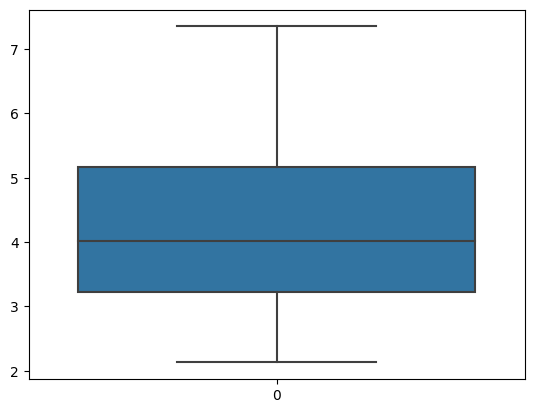

In [48]:
# Plot do Boxplot
sns.boxplot(df['Adj Close'])
#Primeiro risco = min 2.130000
#Segundo risco = 1º Quartil 25%
#Terceiro risco = 2º Quartil 50%
#Quarto risco = 3º Quartil 75%
#Quinto risco  = max 7.350000

In [49]:
#Medidas de dispersão
#As medidas de dispersão auxiliam as medidas de tendência central a descrever o conjunto de dados adequadamente. 
#Indicam se os dados estão, ou não, próximos uns dos outros.

In [50]:
#Amplitude Total
#A amplitude total de um conjunto de dados é a diferença entre o maior e o menor valor observado.
df['Adj Close'].max() - df['Adj Close'].min()

5.21999979019165

In [51]:
#Amplitude Interquartílica
#A amplitude interquartílica é a diferença entre o terceiro e o primeiro quartil. 
#Esta medida é mais estável que a amplitude total por não considerar os valores mais extremos
df['Adj Close'].describe()[6:7].values - df['Adj Close'].describe()[4:5].values

#Quarto risco = 3º Quartil 75% - #Terceiro risco = 1º Quartil 25%

array([1.92750007])

In [52]:
#Amplitude semi-interquartílica
#A amplitude semi-interquartílica é definida como a média aritmética da diferença entre a mediana e os quartis.
(df['Adj Close'].describe()[6:7].values - df['Adj Close'].describe()[4:5].values) / 2

array([0.96375003])

In [53]:
#Variância
#Uma medida de dispersão que mostra quão distantes os valores estão da média
df['Adj Close'].var()

1.7811690982963424

In [54]:
#Desvio padrão
#é simplesmente o resultado positivo da raiz quadrada da variância.
df['Adj Close'].std() 

1.3346044726046524

In [55]:
#Medidas de Assimetria
#A medida de assimetria é um indicador da forma da distribuição dos dados. 
#Ao construir uma distribuição de freqüências e/ou um histograma, está-se buscando, também, 
#identificar visualmente, a forma da distribuição dos dados

#Simétrica se resultado = 0
#Assimétrica negativa se resultado < 0
#Assimétrica positiva se resultado > 0
#S = [(n / ((n - 1) * (n - 2))) * somatório(xi - x_medio) ^ 3 / (s ^ 3)]

#n é o tamanho da amostra;
#xi é o valor do i-ésimo elemento da amostra;
#x_medio é a média da amostra;
#s é o desvio padrão amostral.

df['Adj Close'].skew() #Como o resultado foi positivo: Assimétrica positiva

0.5549749594533832

<Axes: xlabel='Adj Close', ylabel='Density'>

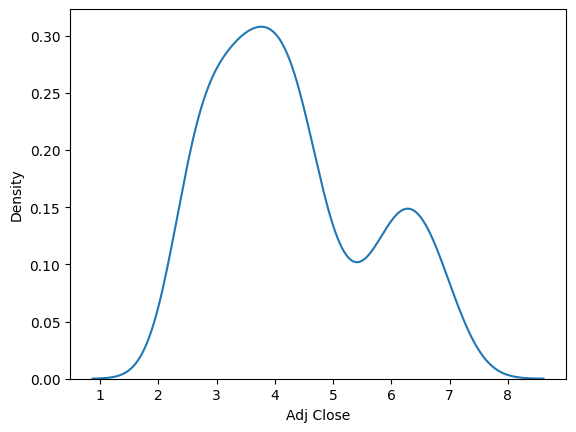

In [56]:
sns.kdeplot(df['Adj Close'])

In [57]:
#Medidas de Curtose
#A medida de curtose é o grau de achatamento da distribuição, é um indicador da forma desta distribuição

#Leptocúrtica: quando a distribuição apresenta uma curva de freqüência bastante fechada, com os dados fortemente 
#concentrados em torno de seu centro, K < 0,263.

#Mesocúrtica: quando os dados estão razoavelmente concentrados em torno de seu centro, K= 0,263

#Platicúrtica: quando a distribuição apresenta uma curva de freqüência mais aberta, com os dados fracamente 
#concentrados em torno de seu centro, K > 0,263.

df['Adj Close'].kurtosis() #platicúrtica

-0.7827665832165116

In [58]:
#Correlação
#Quando fazer análise de correlação?
#Quando você tem uma hipótese de que o aumento ou queda em uma variável estão associados à evolução de outra variável, 
#por exemplo, se aumentar o desconto, as vendas também aumentam.

In [59]:
#Correlação de Pearson
#O coeficiente de correlação de Pearson pode ter um intervalo de valores de +1 a -1. 
#Um valor de 0 indica que não há associação entre as duas variáveis. Um valor maior que 0 indica uma associação positiva. 
#Isto é, à medida que o valor de uma variável aumenta, o mesmo acontece com o valor da outra variável. 
#Um valor menor que 0 indica uma associação negativa. Isto é, à medida que o valor de uma variável aumenta, o valor da outra diminui.
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.994936,0.995731,0.987454,0.987454,-0.310586
High,0.994936,1.000000,0.996042,0.995786,0.995786,-0.267464
Low,0.995731,0.996042,1.000000,0.995078,0.995078,-0.323664
Close,0.987454,0.995786,0.995078,1.000000,1.000000,-0.282409
Adj Close,0.987454,0.995786,0.995078,1.000000,1.000000,-0.282409
Volume,-0.310586,-0.267464,-0.323664,-0.282409,-0.282409,1.000000


<Axes: >

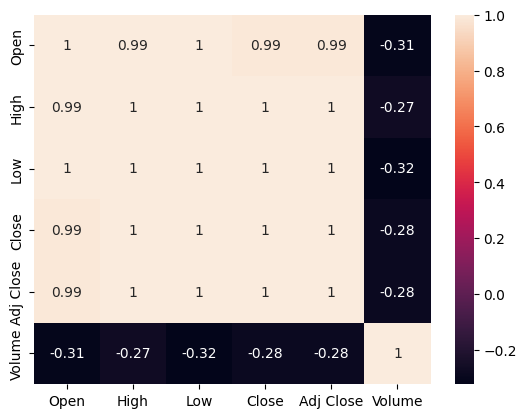

In [60]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='High', ylabel='Adj Close'>

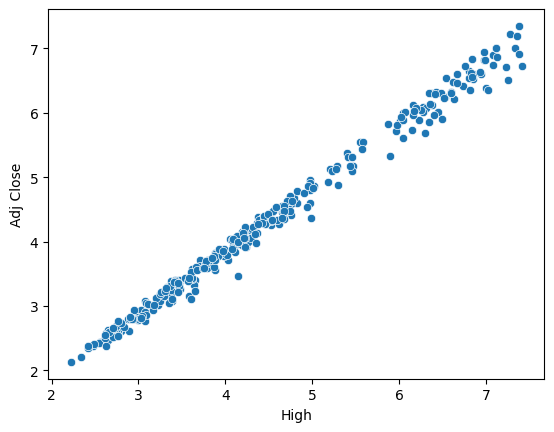

In [61]:
sns.scatterplot(data=df, x='High', y='Adj Close')

In [62]:
#Correlação de Spearman
#Uma vez que a correlação de Spearman segue uma lógica monotética, e não tem pressupostos lineares como na correlação de Pearson, 
#é possível utilizar o rs para relações não lineares

In [63]:
df.corr('spearman')

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.992525,0.994342,0.984212,0.984212,-0.281115
High,0.992525,1.000000,0.994463,0.995045,0.995045,-0.231953
Low,0.994342,0.994463,1.000000,0.993474,0.993474,-0.293245
Close,0.984212,0.995045,0.993474,1.000000,1.000000,-0.247234
Adj Close,0.984212,0.995045,0.993474,1.000000,1.000000,-0.247234
Volume,-0.281115,-0.231953,-0.293245,-0.247234,-0.247234,1.000000


<Axes: >

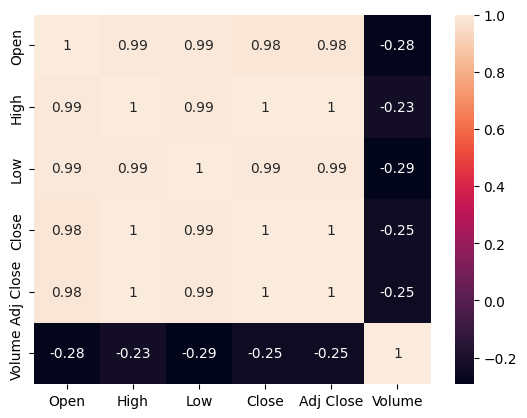

In [64]:
sns.heatmap(df.corr('spearman'), annot=True )

<Axes: xlabel='High', ylabel='Adj Close'>

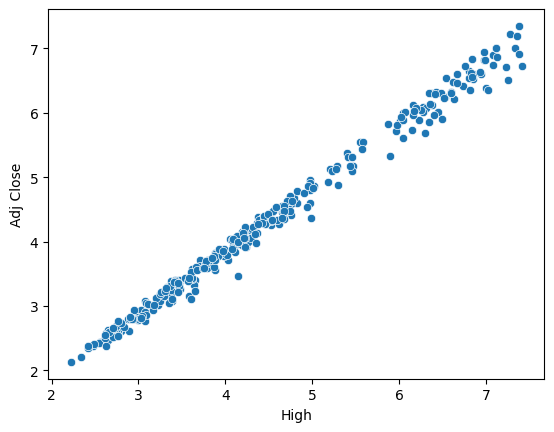

In [65]:
sns.scatterplot(data=df, x='High', y='Adj Close')